D:\anaconda\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


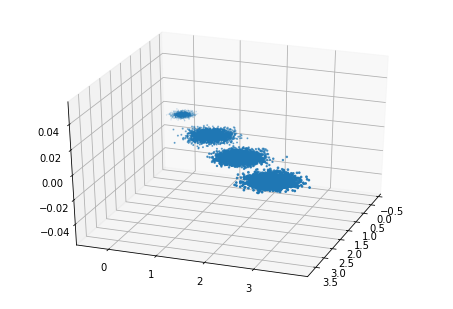

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

### 先不降维，只对数据进行投影，看看投影后的三个维度的方差分布

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print (pca.explained_variance_ratio_)

[ 0.98318212  0.00850037  0.00831751]


### 从三维降到2维

In [14]:
pca = PCA(n_components=2)
pca.fit(X)
print (pca.explained_variance_ratio_)

[ 0.98318212  0.00850037]


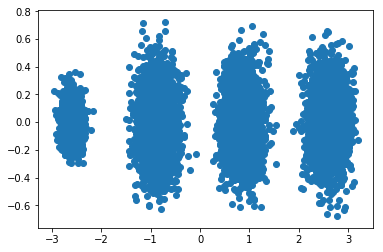

In [15]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

### 从三维降到1维

In [17]:
pca = PCA(n_components=1)
pca.fit(X)
print (pca.explained_variance_ratio_)

[ 0.98318212]


[[ 1.29049617 -2.5902227   2.81225258 ...,  2.52492314  2.98206456
   2.28089246]]


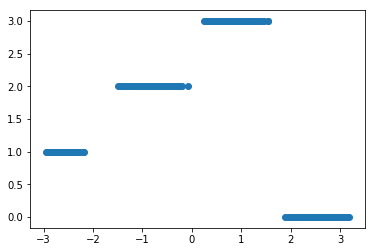

(10000,)
(10000,)
[[-2.65637339]
 [ 0.59728496]
 [-2.44420858]
 ..., 
 [-2.79643689]
 [-2.73977298]
 [ 0.93068019]] (7500,)


In [41]:
X_new = pca.transform(X)
print(X_new.reshape(1,-1))
plt.scatter(X_new.reshape(1,-1)[0],y,marker='o')
plt.show()
x_data = X_new.reshape(1,-1)[0]
y_data = y
print(x_data.shape)
print(y_data.shape)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=0)
print(x_train.reshape(-1, 1),y_train.shape)

### PCA处理后预测

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train.reshape(-1, 1),y_train)
print("训练集精度：",knn.score(x_train.reshape(-1, 1),y_train))
print("测试集精度：",knn.score(x_test.reshape(-1, 1),y_test))

训练集精度： 1.0
测试集精度： 1.0


### PCA处理前预测

In [43]:
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
knn_0 = KNeighborsClassifier()
knn_0.fit(x_train,y_train)
print("训练集精度：",knn_0.score(x_train,y_train))
print("测试集精度：",knn_0.score(x_test,y_test))

训练集精度： 1.0
测试集精度： 1.0


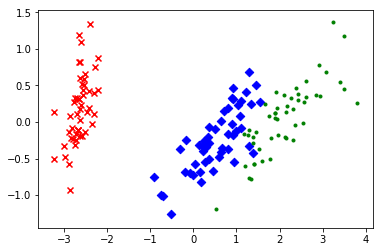

In [46]:
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.datasets.base import load_iris

x,y=load_iris(return_X_y=True) #加载数据，x表示数据集中的属性数据，y表示数据标签
pca=dp.PCA(n_components=2) #加载pca算法，设置降维后主成分数目为2
reduced_x=pca.fit_transform(x) #对原始数据进行降维，保存在reduced_x中
red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
for i in range(len(reduced_x)): #按鸢尾花的类别将降维后的数据点保存在不同的表表中
    if y[i]==0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i]==1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()

In [48]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components='mle')
pca.fit(X)
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)

[ 0.99244289]


In [2]:
from sklearn import datasets